<a href="https://colab.research.google.com/github/Regemsalelement/data-analytics/blob/main/Export_from_sheet_%C6%8FDV_%C6%8Flav%C9%99_D%C9%99y%C9%99r_Vergisi_izah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gspread
import pandas as pd
from google.auth import default
from google.colab import auth
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
spreadsheet = gc.open_by_key('1iPM12Uhkwg2I_gO1Bp3QLUaKys0rUMeOzRdLekH-atQ')
worksheet = spreadsheet.get_worksheet(0)
df = pd.DataFrame(worksheet.get("B23:L28"))
# Code for making the first row as header. Remove if not needed.
df.columns = df.iloc[0]
df = df.drop(0)
df.head()

,,Fermer,,İstehsalçı,,Topdansatış,,Pərakəndə satış,,İstehlakçı cəmi
1,Tam Şatış Dəyəri,₼ ...,,₼ ...,,₼ 300,,₼ 400,,₼ 400
2,Yaranan Əlavə Dəyər,₼ ...,,₼ ...,,₼ 100,,₼ 100,,₼
3,çıxış ƏDV,₼ ...,,₼ ...,,₼ 54,,₼ 72,,₼ 180
4,-/- giriş ƏDV,₼ ...,,₼ ...,,₼ -36,,₼ -54,,₼ -108
5,büdcəyə ödəniş ƏDV,₼ ...,,₼ ...,,₼ 18,,₼ 18,,₼ 72


In [ ]:
import pandas as pd
from vega_datasets import data
df = data.movies()
df

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,Zack and Miri Make a Porno,31452765.0,36851125.0,21240321.0,24000000.0,Oct 31 2008,R,101.0,Weinstein Co.,Original Screenplay,Comedy,Contemporary Fiction,Kevin Smith,65.0,7.0,55687.0
3197,Zodiac,33080084.0,83080084.0,20983030.0,85000000.0,Mar 02 2007,R,157.0,Paramount Pictures,Based on Book/Short Story,Thriller/Suspense,Dramatization,David Fincher,89.0,NaN,NaN
3198,Zoom,11989328.0,12506188.0,6679409.0,35000000.0,Aug 11 2006,PG,NaN,Sony Pictures,Based on Comic/Graphic Novel,Adventure,Super Hero,Peter Hewitt,3.0,3.4,7424.0
3199,The Legend of Zorro,45575336.0,141475336.0,NaN,80000000.0,Oct 28 2005,PG,129.0,Sony Pictures,Remake,Adventure,Historical Fiction,Martin Campbell,26.0,5.7,21161.0


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1ntIRRK6l4DS3HmIkoHvb7KN8zGAOOkSiPj7jKNt_TSw#gid=0


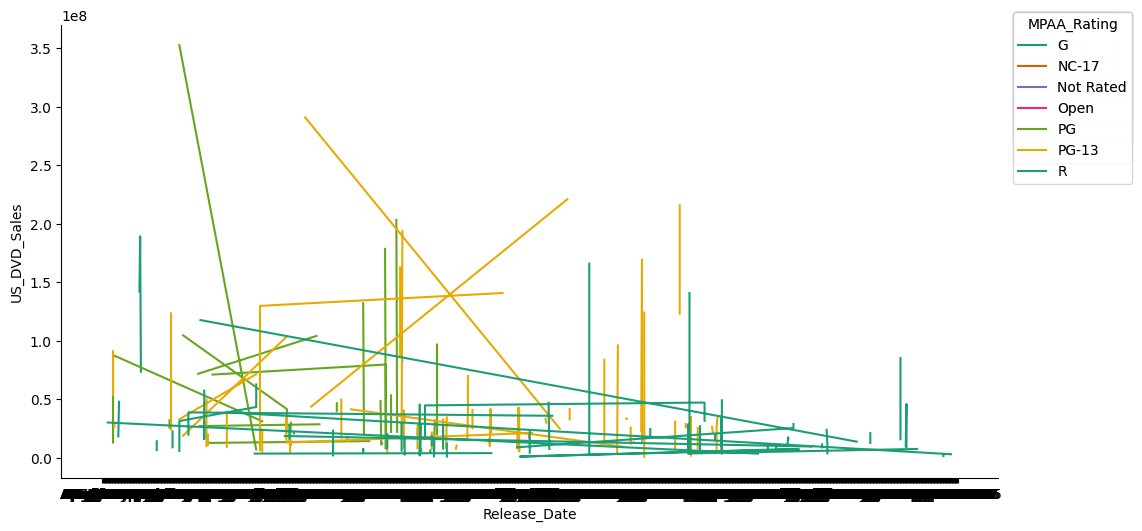

In [ ]:
# @title Release_Date vs US_DVD_Sales

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Release_Date']
  ys = series['US_DVD_Sales']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Release_Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MPAA_Rating')):
  _plot_series(series, series_name, i)
  fig.legend(title='MPAA_Rating', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Release_Date')
_ = plt.ylabel('US_DVD_Sales')

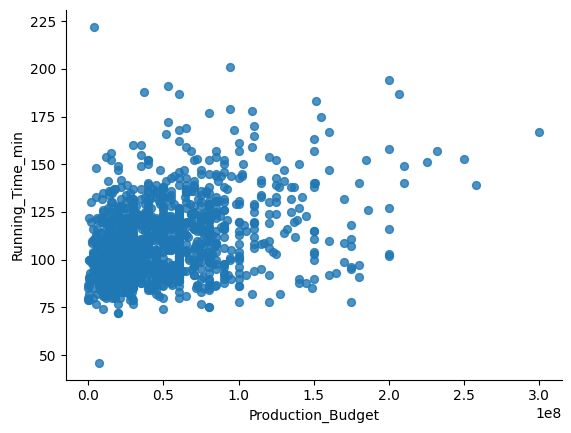

In [ ]:
# @title Production_Budget vs Running_Time_min

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Production_Budget', y='Running_Time_min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

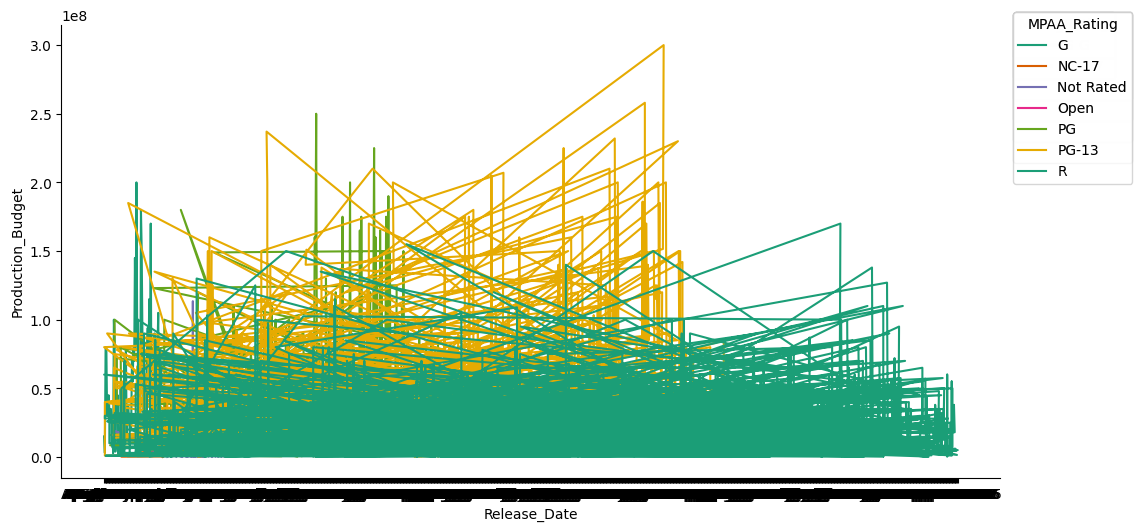

In [ ]:
# @title Release_Date vs Production_Budget

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Release_Date']
  ys = series['Production_Budget']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Release_Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MPAA_Rating')):
  _plot_series(series, series_name, i)
  fig.legend(title='MPAA_Rating', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Release_Date')
_ = plt.ylabel('Production_Budget')